In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np

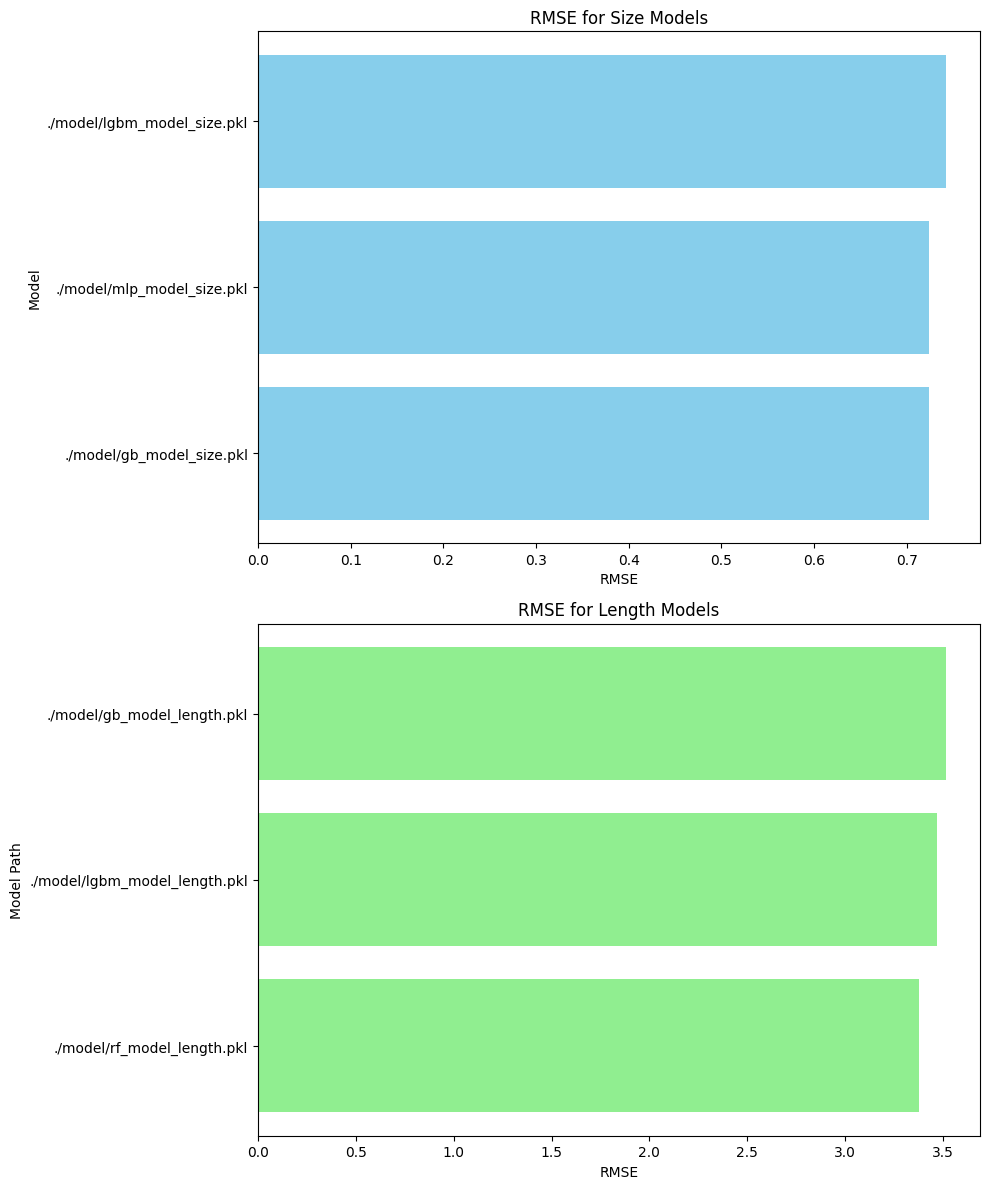

In [36]:
# モデルの結果を読み込む
length_results_df = pd.read_csv('./result/length_evaluation_results.csv')
size_results_df = pd.read_csv('./result/size_evaluation_results.csv')
# モデルファイルのパス
model_files = {
    'length_model_first.pkl': './result/length_model_first.pkl',
    'length_model_second.pkl': './result/length_model_second.pkl',
    'length_model_third.pkl': './result/length_model_third.pkl',
    'size_model_first.pkl': './result/size_model_first.pkl',
    'size_model_second.pkl': './result/size_model_second.pkl',
    'size_model_third.pkl': './result/size_model_third.pkl'
}

# 棒グラフを作成
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# SizeモデルのRMSEをプロット
size_results = size_results_df[size_results_df['Model Path'].str.contains('size')].sort_values(by='RMSE')
axes[0].barh(size_results['Model Path'], size_results['RMSE'], color='skyblue')
axes[0].set_title('RMSE for Size Models')
axes[0].set_xlabel('RMSE')
axes[0].set_ylabel('Model')

# LengthモデルのRMSEをプロット
length_results = length_results_df[length_results_df['Model Path'].str.contains('length')].sort_values(by='RMSE')
axes[1].barh(length_results['Model Path'], length_results['RMSE'], color='lightgreen')
axes[1].set_title('RMSE for Length Models')
axes[1].set_xlabel('RMSE')
axes[1].set_ylabel('Model Path')

plt.tight_layout()
plt.savefig('./rmse_comparison.png')
plt.show()



./model/gb_model_size.pkl Accuracy:0.8311258278145696 RMSE:0.7239778109688635
./model/rf_model_length.pkl Accuracy:0.8841059602649006 RMSE:3.376106396419311


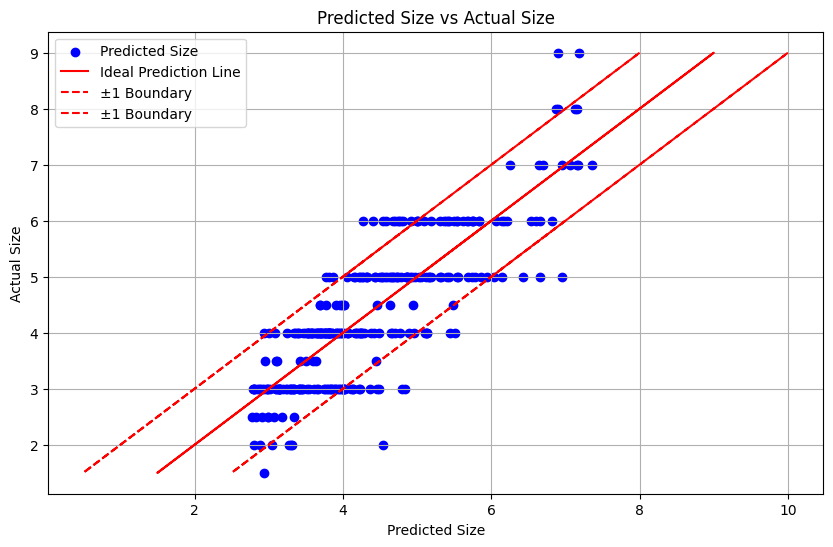

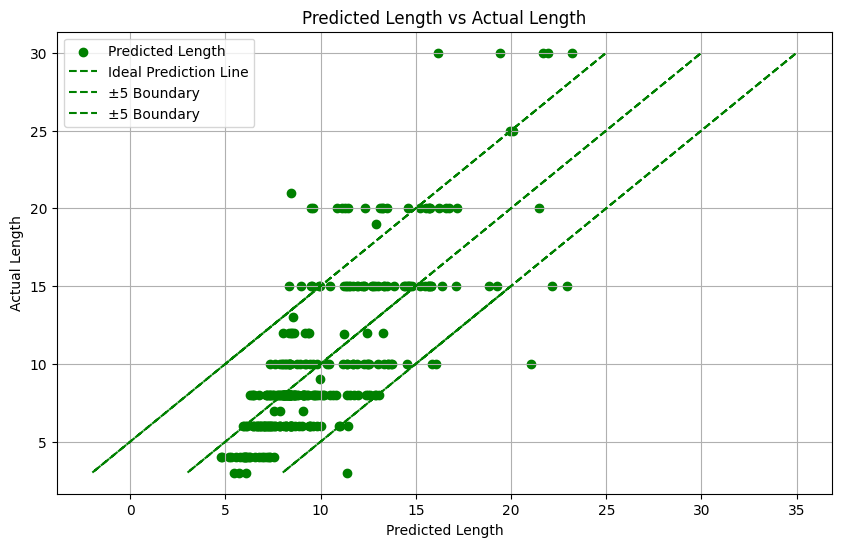

In [37]:
# データの読み込み
train_data = pd.read_csv('./dataset/exp_dataset/medid_1_v8/train.csv')
val_data = pd.read_csv('./dataset/exp_dataset/medid_1_v8/val.csv')
test_data = pd.read_csv('./dataset/exp_dataset/medid_1_v8/test.csv')

# 説明変数と目的変数の設定
X_train = train_data[['Sex', 'Age', 'Aneu_neck', 'Aneu_width', 'Aneu_height', 'Aneu_volume', 'Aneu_location', 'Adj_tech', 'Is_bleb']]
y_length_train = train_data['coil_length1']
y_size_train = train_data['coil_size1']

X_val = val_data[['Sex', 'Age', 'Aneu_neck', 'Aneu_width', 'Aneu_height', 'Aneu_volume', 'Aneu_location', 'Adj_tech', 'Is_bleb']]
y_length_val = val_data['coil_length1']
y_size_val = val_data['coil_size1']

X_test = test_data[['Sex', 'Age', 'Aneu_neck', 'Aneu_width', 'Aneu_height', 'Aneu_volume', 'Aneu_location', 'Adj_tech', 'Is_bleb']]
y_length_test = test_data['coil_length1']
y_size_test = test_data['coil_size1']

# カテゴリ変数をダミー変数に変換
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

# 訓練データとバリデーションデータのカラムを一致させる
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 評価結果の読み込み
size_evaluation_results = pd.read_csv('./result/size_evaluation_results.csv')
length_evaluation_results = pd.read_csv('./result/length_evaluation_results.csv')

# 最も正答率が高いサイズモデルと長さモデルの予測を取得
best_size_model_path = size_evaluation_results.sort_values(by='RMSE', ascending=True).iloc[0]['Model Path']
best_length_model_path = length_evaluation_results.sort_values(by='RMSE', ascending=True).iloc[0]['Model Path']

best_size_rmse = size_evaluation_results.sort_values(by='RMSE', ascending=True).iloc[0]['RMSE']
best_size_accuracy = size_evaluation_results.sort_values(by='RMSE', ascending=True).iloc[0]['Accuracy']

best_length_rmse = length_evaluation_results.sort_values(by='RMSE', ascending=True).iloc[0]['RMSE']
best_length_accuracy = length_evaluation_results.sort_values(by='RMSE', ascending=True).iloc[0]['Accuracy']

print(f"{best_size_model_path} Accuracy:{best_size_accuracy} RMSE:{best_size_rmse}")
print(f"{best_length_model_path} Accuracy:{best_length_accuracy} RMSE:{best_length_rmse}")
# モデルの読み込み
best_size_model = joblib.load(best_size_model_path)
best_length_model = joblib.load(best_length_model_path)

# 予測
best_size_predictions = best_size_model.predict(X_test)
best_length_predictions = best_length_model.predict(X_test)

# プロット
plt.figure(figsize=(10, 6))

# サイズの散布図
plt.scatter(best_size_predictions, y_size_test, color='blue', label='Predicted Size')
plt.plot(y_size_test, y_size_test, color='red', linestyle='-', label='Ideal Prediction Line')
plt.plot(y_size_test+1, y_size_test, color='red', linestyle='--', label='±1 Boundary')
plt.plot(y_size_test-1, y_size_test, color='red', linestyle='--', label='±1 Boundary')
plt.xlabel('Predicted Size')
plt.ylabel('Actual Size')
plt.title('Predicted Size vs Actual Size')
plt.legend()
plt.grid(True)
plt.savefig('./predicted_size.png')
plt.show()

# 長さの散布図
plt.figure(figsize=(10, 6))
plt.scatter(best_length_predictions, y_length_test, color='green', label='Predicted Length')
plt.plot(y_length_test, y_length_test, color='green', linestyle='--', label='Ideal Prediction Line')
plt.plot(y_length_test+5, y_length_test, color='green', linestyle='--', label='±5 Boundary')
plt.plot(y_length_test-5, y_length_test, color='green', linestyle='--', label='±5 Boundary')
plt.xlabel('Predicted Length')
plt.ylabel('Actual Length')
plt.title('Predicted Length vs Actual Length')
plt.legend()
plt.grid(True)
plt.savefig('./predicted_length.png')
plt.show()

18


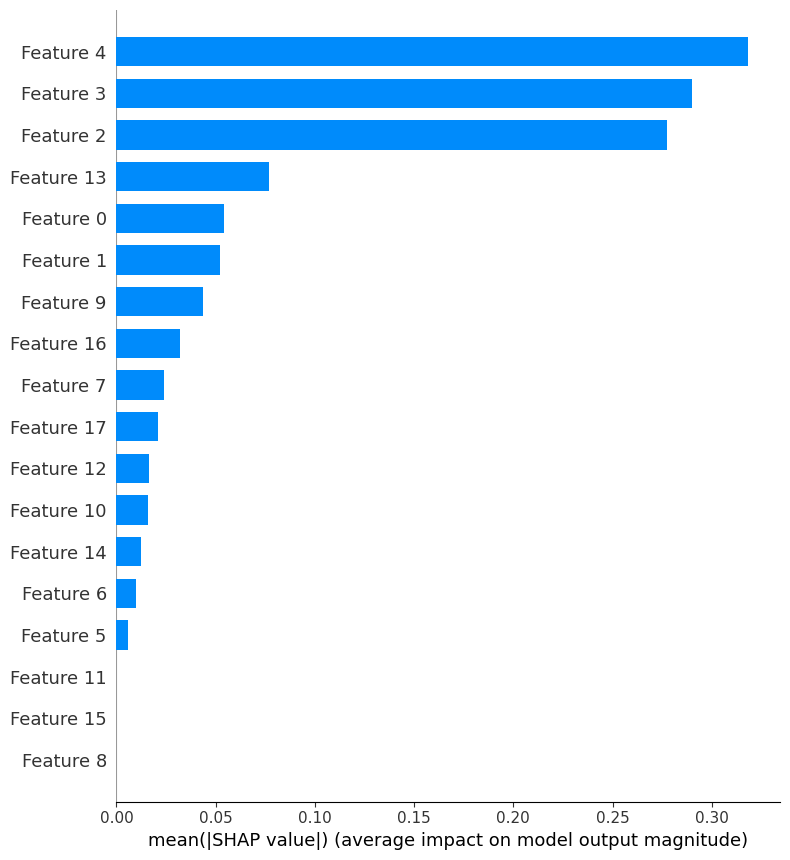

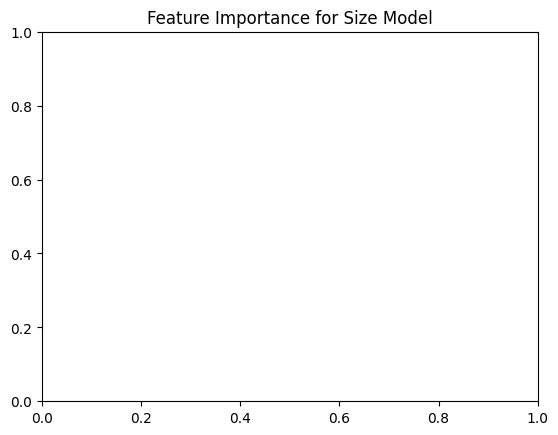

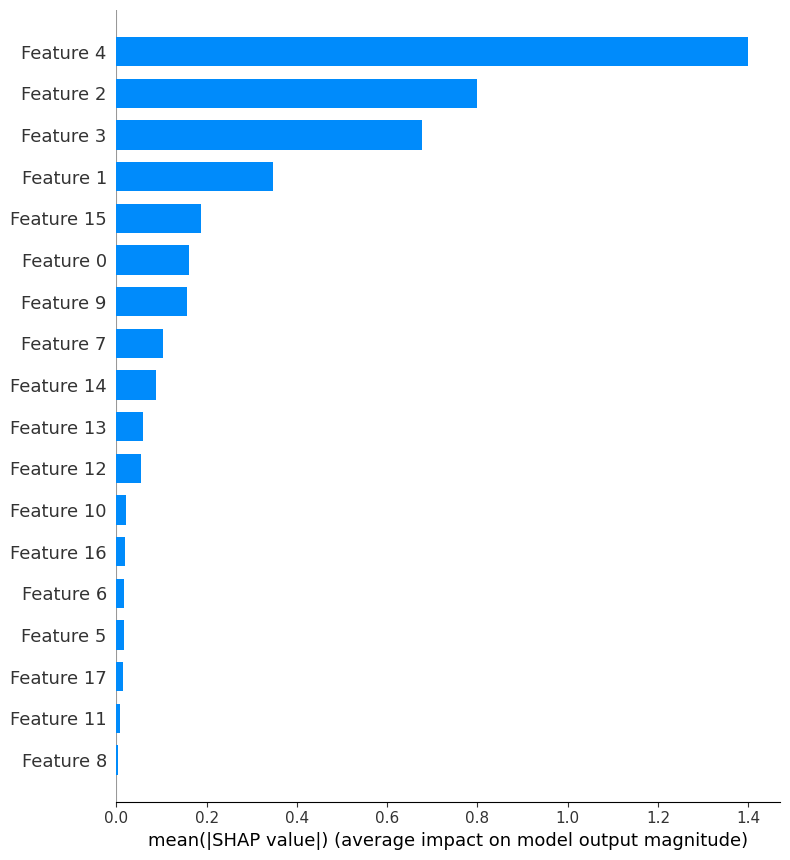

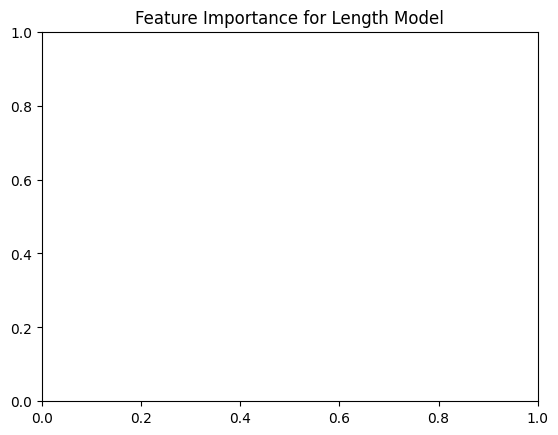

In [49]:
import shap
import matplotlib.pyplot as plt



# SHAP値の計算
explainer_size = shap.TreeExplainer(best_size_model)
shap_values_size = explainer_size.shap_values(X_test)

explainer_length = shap.TreeExplainer(best_length_model)
shap_values_length = explainer_length.shap_values(X_test)




# SHAP値の棒グラフ

shap.summary_plot(shap_values_size, X_test, plot_type="bar")
plt.title('Feature Importance for Size Model')
plt.show()


shap.summary_plot(shap_values_length, X_test, plot_type="bar")
plt.title('Feature Importance for Length Model')
plt.show()